# Propaganda Detection

## Environment Setup

In [1]:
#preliminary imports

#useful other tools
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [2]:
#loading training data
training_df = pd.read_csv('./dataset/train.tsv',sep='\t')
training_df

,label,tagged_in_context
0,not_propaganda,"No, <BOS> he <EOS> will not be confirmed."
1,not_propaganda,This declassification effort <BOS> won’t make ...
2,flag_waving,The Obama administration misled the <BOS> Amer...
3,not_propaganda,“It looks like we’re capturing the demise of t...
4,not_propaganda,"<BOS> Location: Westerville, Ohio <EOS>"
...,...,...
2409,not_propaganda,<BOS> We support and appreciate <EOS> your bus...
2410,not_propaganda,International Atomic Energy Agency (IAEA) Dire...
2411,not_propaganda,What has been done: there has been work on for...
2412,not_propaganda,This is <BOS> the law of gradualness not the g...


In [3]:
#loading testing data
testing_df = pd.read_csv('./dataset/test.tsv',sep='\t')
testing_df

,label,tagged_in_context
0,not_propaganda,"On average, between 300 and 600 infections are..."
1,causal_oversimplification,Mostly because <BOS> the country would not las...
2,appeal_to_fear_prejudice,Lyndon Johnson <BOS> gets Earl Warren and Sen....
3,not_propaganda,<BOS> You <EOS> may opt out at anytime.
4,repetition,It must be exacted from him directly in order ...
...,...,...
575,not_propaganda,"NewsCatholic Church, <BOS> Family, Marriage <E..."
576,not_propaganda,"Remember our saying, modern day fairy <BOS> ta..."
577,not_propaganda,Why <BOS> not <EOS> open up to Iran with massi...
578,flag_waving,<BOS> He also sang an Islamic State fight song...


In [4]:
training_df.label.unique()

array(['not_propaganda', 'flag_waving', 'loaded_language', 'doubt',
       'name_calling,labeling', 'appeal_to_fear_prejudice', 'repetition',
       'causal_oversimplification', 'exaggeration,minimisation'],
      dtype=object)

In [5]:
#checking duplicates
training_df.duplicated().sum(),testing_df.duplicated().sum()

(9, 0)

In [6]:
#removing duplicates from training data
training_df.drop_duplicates(inplace=True)

In [7]:
#checking NaN values
training_df.isna().sum(),testing_df.isna().sum()

(label                0
 tagged_in_context    0
 dtype: int64,
 label                0
 tagged_in_context    0
 dtype: int64)

In [8]:
#assigning the 'label':1 to all the propaganda techniques in training set
training_df['binary_label'] = (training_df['label'] != 'not_propaganda').astype(int)
training_df

,label,tagged_in_context,binary_label
0,not_propaganda,"No, <BOS> he <EOS> will not be confirmed.",0
1,not_propaganda,This declassification effort <BOS> won’t make ...,0
2,flag_waving,The Obama administration misled the <BOS> Amer...,1
3,not_propaganda,“It looks like we’re capturing the demise of t...,0
4,not_propaganda,"<BOS> Location: Westerville, Ohio <EOS>",0
...,...,...,...
2409,not_propaganda,<BOS> We support and appreciate <EOS> your bus...,0
2410,not_propaganda,International Atomic Energy Agency (IAEA) Dire...,0
2411,not_propaganda,What has been done: there has been work on for...,0
2412,not_propaganda,This is <BOS> the law of gradualness not the g...,0


In [9]:
#assigning the 'label':1 to all the propaganda techniques in testing set
testing_df['binary_label'] = (testing_df['label'] != 'not_propaganda').astype(int)
testing_df

,label,tagged_in_context,binary_label
0,not_propaganda,"On average, between 300 and 600 infections are...",0
1,causal_oversimplification,Mostly because <BOS> the country would not las...,1
2,appeal_to_fear_prejudice,Lyndon Johnson <BOS> gets Earl Warren and Sen....,1
3,not_propaganda,<BOS> You <EOS> may opt out at anytime.,0
4,repetition,It must be exacted from him directly in order ...,1
...,...,...,...
575,not_propaganda,"NewsCatholic Church, <BOS> Family, Marriage <E...",0
576,not_propaganda,"Remember our saying, modern day fairy <BOS> ta...",0
577,not_propaganda,Why <BOS> not <EOS> open up to Iran with massi...,0
578,flag_waving,<BOS> He also sang an Islamic State fight song...,1


### Distribution plots for training data

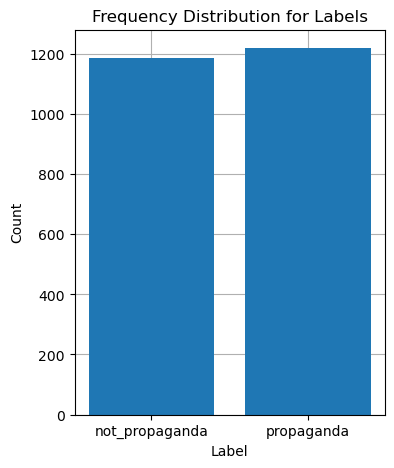

In [10]:
# Distribution plot for the binary labels
fig, ax = plt.subplots(figsize=(4, 5))

# Get counts
counts = training_df.binary_label.value_counts().sort_index()

# Plot with integer x positions
bars = plt.bar(counts.index, counts.values)

# Replace 0 and 1 with string labels on x-axis
ax.set_xticks([0, 1])
ax.set_xticklabels(['not_propaganda', 'propaganda'])

# Axis labels and title
ax.grid()
ax.set_axisbelow(True)
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_title('Frequency Distribution for Labels')

plt.show()
